In [116]:
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt
import cv2 
import os

## Bulding PCA model

In [117]:
class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components = None
        # self.covariance_matrix = None
        self.mean = None

    def normalization(self,image):
        temp = deepcopy(image)
        mean = temp.mean(axis=0)
        print("image: \n",temp, temp.shape)
        print("mean: \n",mean,mean.shape)
        print(temp - mean)
        temp = temp - mean
        self.mean= mean
        return temp
    
    def calc_covariance(self,vector1,vector2) :
        vec1 = deepcopy(vector1)
        vec2 = deepcopy(vector2)
        vec1_mean = vec1.mean()
        vec2_mean = vec2.mean()
        vec1 = vec1-vec1_mean
        vec2 = vec2-vec2_mean
        vec2 = vec2.T
        return (np.dot(vec1,vec2)/(len(vec1)-1))

    def covariance(self,image):
        temp = deepcopy(image)
        temp = temp.T
        covariance_matrix= np.zeros((len(image[0]),len(image[0])))
        for component1 in range(len(temp)):
            for component2 in range(len(temp)):
                variance =self.calc_covariance(temp[component1],temp[component2])
                covariance_matrix[component1][component2]= variance
        return covariance_matrix

    def calc_eign(self,matrix):
        eigen_values,eigen_vectors = np.linalg.eig(matrix)
        return eigen_values,eigen_vectors


    def fit(self,image):
        normalized_img = self.normalization(image)

        covariance_matrix = self.covariance(normalized_img)
        # self.covariance_matrix = covariance_matrix

        eigen_values,eigen_vectors = self.calc_eign(covariance_matrix) 
        eigen_vectors = eigen_vectors.T   
        indecis = np.argsort(eigen_values)[::-1]
        eigen_values =eigen_values[indecis]
        eigen_vectors = eigen_vectors[indecis]

        self.components= eigen_vectors[:self.n_components]
    def transform(self,image):
        temp = deepcopy(image)
        temp = temp - self.mean
        new_image = np.dot(temp,self.components.T)
        return np.array(new_image)

    def reverse(self,image):
        result =np.dot(image,self.components)

        return result+self.mean

## PCA on one gray image

### Helper Functions

In [118]:
def readimage(path):
        img =cv2.imread(path)
        img = cv2.resize(img,(500,500))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        return img

### Code

In [119]:
image = readimage('data/test.jpg')
image.shape

(500, 500)

image: 
 [[31 28 28 ... 60 61 66]
 [32 31 28 ... 59 59 63]
 [32 29 31 ... 57 60 63]
 ...
 [19 18 19 ... 39 41 40]
 [17 18 18 ... 40 41 40]
 [17 19 17 ... 41 41 40]] (500, 500)
mean: 
 [ 33.626  34.892  35.8    36.652  37.53   37.656  36.602  35.21   33.374
  31.362  29.294  27.276  25.166  23.078  22.048  21.902  22.232  22.542
  22.916  23.394  23.966  24.674  26.242  28.886  32.062  35.194  38.218
  40.17   41.492  41.21   40.238  38.502  36.54   33.95   31.702  30.274
  29.082  28.37   27.874  27.3    27.078  26.982  26.776  26.836  26.846
  26.868  27.086  27.146  27.266  27.326  27.476  27.612  27.71   27.832
  27.982  28.35   28.732  28.838  29.042  29.164  29.36   29.558  29.518
  29.932  30.062  30.286  30.714  30.864  31.116  31.18   31.36   31.608
  31.51   31.586  31.644  31.566  31.704  32.026  32.392  33.078  33.54
  34.262  34.868  35.198  35.484  35.766  35.922  36.246  36.39   36.72
  36.69   36.746  36.732  36.802  37.01   37.056  36.882  36.756  36.516
  36.17   36.62

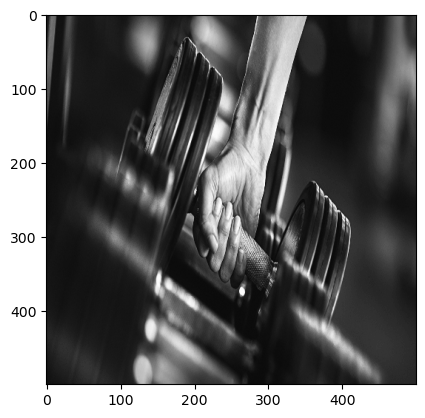

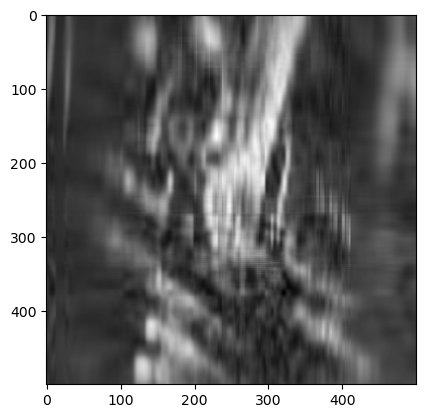

image size: 2000000, 
PCA's image size: 40000, 
reverrsed image size: 2000000


In [120]:
pca = PCA(n_components=10)
pca.fit(image)
image = np.array(image, dtype=np.float64)
pca_image= pca.transform(image)
print(image.nbytes)
print(pca_image.nbytes)
pca_reverse = pca.reverse(pca_image) 
pca_reverse = np.real(pca_reverse)
print("pca image shape: ",pca_image.shape)
plt.imshow(image,cmap="gray")
plt.show()
plt.imshow(pca_reverse,cmap="gray")
plt.show()

print("image size: {}, \nPCA's image size: {}, \nreverrsed image size: {}".format(image.nbytes, pca_image.nbytes, pca_reverse.nbytes))

In [121]:
np.array([[1,2,3],[211312,321312,321312]]).nbytes

24

## PCA on Multi-Images

### Helper Functions

In [132]:
class Flatten():
    def __init__(self):
        pass
    def flatten(self,images):
        flattened_images = [image.reshape(-1) for image in images]
        self.original_shape = images[0].shape  
        return np.array(flattened_images,dtype=np.float64)
    
    def deflatten(self, images):
      
        return [image.reshape(self.original_shape) for image in images]


In [133]:
def readimage(path):
        img =cv2.imread(path)
        img = cv2.resize(img,(15,15))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        return img

In [134]:
def plot_images(images,type= " "):

    num_images = len(images)
    grid_size = int(num_images ** 0.5) + 1 

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))

    axes = axes.flatten()

    for i, image in enumerate(images):
        if type != "gray":
            axes[i].imshow(image)
        else:
            temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            axes[i].imshow(temp, cmap='gray')
        axes[i].axis('off')
        

    for ax in axes[num_images:]:
        ax.axis('off')

    plt.tight_layout()  
    plt.show()



### Code

In [135]:
pathes =os.listdir('data')[1:]

images = np.array([readimage(os.path.join("data",img)) for img in pathes])

flatten = Flatten()
flat_imgs = flatten.flatten(images)
flat_imgs.shape

(6, 675)

In [ ]:
pca = PCA(n_components=500)
pca.fit(flat_imgs)

image: 
 [[255. 252. 248. ... 254. 254. 254.]
 [  0.   0.   0. ...   0.   0.   0.]
 [253. 253. 253. ...   5.   5.   5.]
 [253. 253. 253. ... 253. 253. 253.]
 [252. 252. 252. ... 253. 253. 253.]
 [253. 253. 253. ... 253. 253. 253.]] (6, 675)
mean: 
 [211.         210.5        209.83333333 210.83333333 210.66666667
 210.16666667 210.83333333 210.66666667 210.33333333 210.83333333
 210.33333333 210.16666667 210.83333333 210.5        210.66666667
 182.66666667 175.5        168.33333333 182.83333333 175.16666667
 168.         182.83333333 175.66666667 168.33333333 182.5
 175.66666667 168.33333333 182.66666667 175.33333333 168.33333333
 211.         211.16666667 207.5        211.16666667 210.83333333
 210.         210.83333333 210.66666667 210.33333333 211.
 210.5        210.5        211.         210.5        210.33333333
 168.66666667 168.5        168.         168.66666667 168.66666667
 169.         210.66666667 210.66666667 210.33333333 210.33333333
 211.         210.83333333 182.66666667 

In [130]:

pca_imgs=pca.transform(flat_imgs)
reversed_imgs = pca.reverse(pca_imgs)
new_imgs =flatten.deflatten(reversed_imgs)
pca_img = np.real(new_imgs)


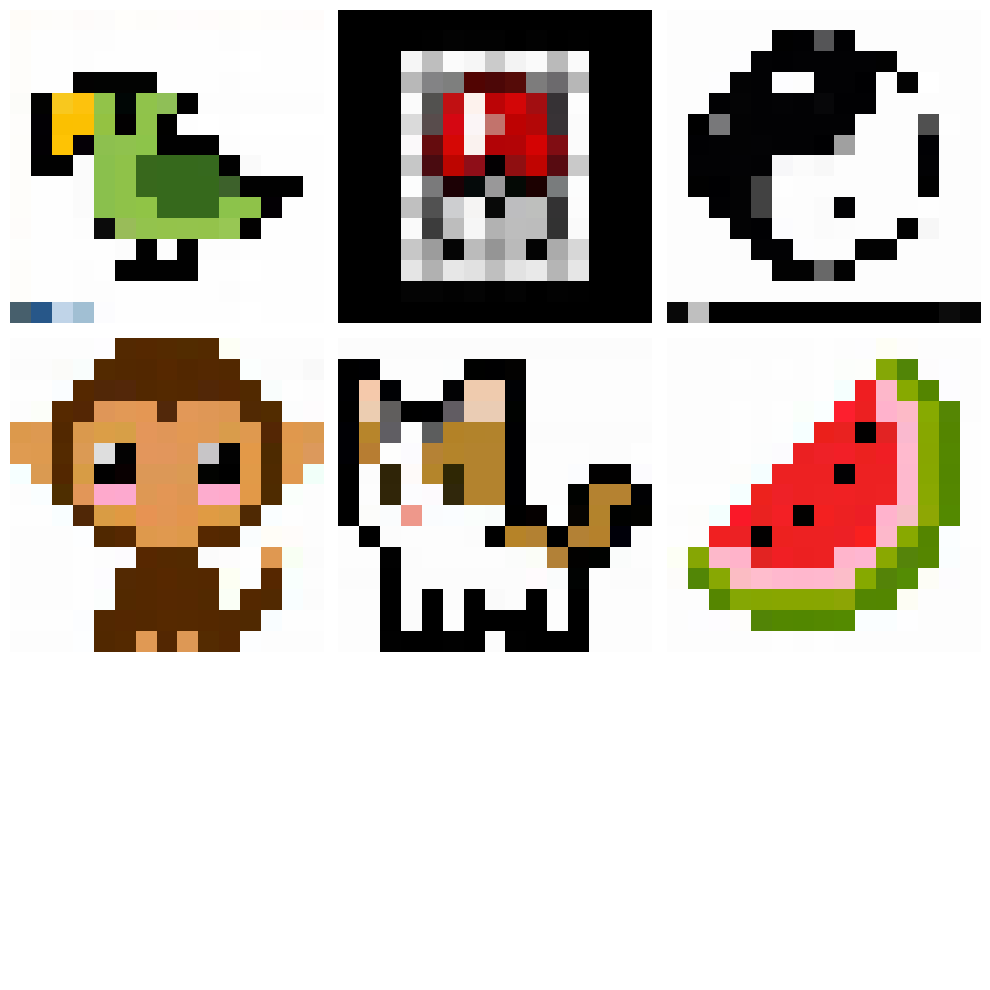

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


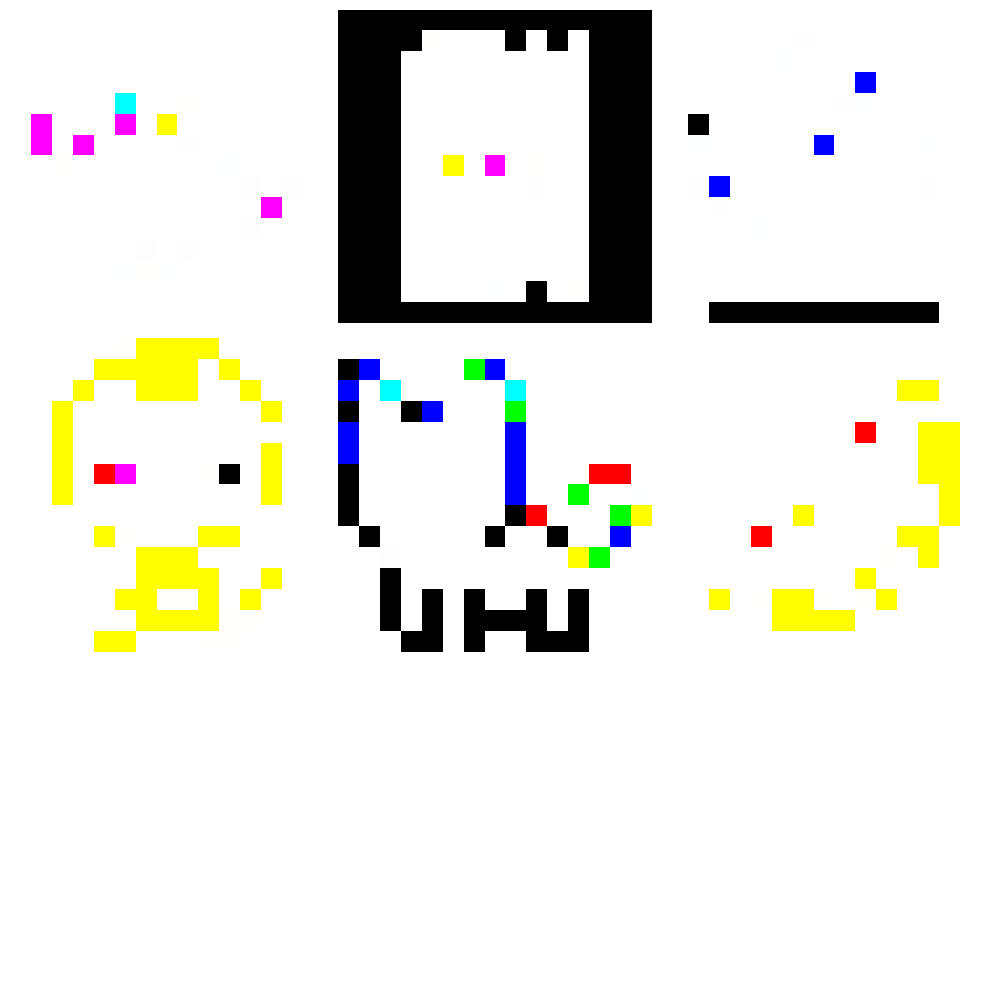

image size: 4050, 
PCA's image size: 57600, 
reverrsed image size: 32400


In [131]:
plot_images(images)
plot_images(pca_img)
print("image size: {}, \nPCA's image size: {}, \nreverrsed image size: {}".format(images.nbytes, pca_imgs.nbytes, pca_img_uint8.nbytes))